In [1]:

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
#from datetime import datetime

from shutil import copyfile
rcParams['figure.figsize'] = 25, 10

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.experimentclasses.RigidEthanolPCA2 import RigidEthanolPCA2
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.otherfunctions.multirun import get_cosines
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell

from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle


def get_grads(experiment, Mpca, Mangles, N, selected_points):
    dimnoise = experiment.dimnoise
    dim = experiment.dim
    cores = experiment.cores

    tangent_bases = Mpca.get_wlpca_tangent_sel(Mpca, selected_points, dimnoise)
    subM = RiemannianManifold(Mpca.data[selected_points], dim)
    subM.tb = TangentBundle(subM, tangent_bases)
    N.tangent_bundle = TangentBundle(N, np.swapaxes(N.geom.rmetric.Hvv[:,:dim,:],1,2))

    df_M = experiment.get_dF_js_idM(Mpca, N, subM.tb, N.tangent_bundle, selected_points, dimnoise)
    df_M2 = df_M / np.sum(np.linalg.norm(df_M, axis=1) ** 2, axis=0)**(0.5)
    dg_x = experiment.get_dx_g_full(Mangles.data[selected_points])

    W = ShapeSpace(experiment.positions, Mangles.data)
    dw = W.get_dw(cores, experiment.atoms3, experiment.natoms, selected_points)
    dg_w = experiment.project(np.swapaxes(dw, 1, 2),
                              experiment.project(dw, dg_x))

    dg_w_pca = np.asarray([np.matmul(experiment.projector, dg_w[j].transpose()).transpose() for j in range(len(selected_points))])
    dgw_norm = experiment.normalize(dg_w_pca)
    dg_M = experiment.project(subM.tb.tangent_bases, dgw_norm)
    return (df_M2, dg_M, dg_w, dg_w_pca, dgw_norm)

#set parameters
n = 10000 #number of data points to simulate
nsel = 10 #number of points to analyze with lasso
#itermax = 1000 #maximum iterations per lasso run
tol = 1e-14 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 0.05 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
nreps = 1
lambda_max = 1
max_search = 30

folder = workingdirectory + '/Figures/rigidethanol/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/rigidethanol_110120_nsel100_nreps25_var0.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)


/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:

new_MN = True
new_grad = True
savename = 'rigidethanol_120620_samgl_n100pallnrep1norm'
savefolder = 'rigidethanol'
loadfolder = 'rigidethanol'
loadname = 'rigidethanol_120620_samgl_n100pallnrep1norm'
if new_MN == True:
    experiment = RigidEthanolPCA2(dim, cor, var, ii, jj, cores, False, atoms4)
    experiment.M, experiment.Mpca, projector = experiment.generate_data(noise=False)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)



Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))


In [7]:
nsel = 10 
atoms4,p = get_all_atoms_4(natoms)
experiment.p = p
experiment.atoms4 = atoms4
#experiment.itermax = itermax
experiment.tol = tol
experiment.dnoise = dim
experiment.nreps = nreps
experiment.nsel = nsel
experiment.folder = folder

replicates = {}
selected_points_save = np.zeros((nreps,nsel))

print('pre-gradient acquisition')
print(datetime.datetime.now())

pre-gradient acquisition
2020-12-20 14:28:52.371407


In [10]:

from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle


def get_grads(experiment, Mpca, Mangles, N, selected_points):
    dimnoise = experiment.dimnoise
    dim = experiment.dim
    cores = experiment.cores

    tangent_bases = Mpca.get_wlpca_tangent_sel(Mpca, selected_points, dimnoise)
    subM = RiemannianManifold(Mpca.data[selected_points], dim)
    subM.tb = TangentBundle(subM, tangent_bases)
    N.tangent_bundle = TangentBundle(N, np.swapaxes(N.geom.rmetric.Hvv[:,:dim,:],1,2))

    df_M = experiment.get_dF_js_idM(Mpca, N, subM.tb, N.tangent_bundle, selected_points, dimnoise)
    df_M2 = df_M / np.sum(np.linalg.norm(df_M, axis=1) ** 2, axis=0)**(0.5)
    dg_x = experiment.get_dx_g_full(Mangles.data[selected_points])

    W = ShapeSpace(experiment.positions, Mangles.data)
    dw = W.get_dw(cores, experiment.atoms3, experiment.natoms, selected_points)
    dg_w = experiment.project(np.swapaxes(dw, 1, 2),
                              experiment.project(dw, dg_x))

    dg_w_pca = np.asarray([np.matmul(experiment.projector, dg_w[j].transpose()).transpose() for j in range(len(selected_points))])
    dgw_norm = experiment.normalize(dg_w_pca)
    dg_M = experiment.project(subM.tb.tangent_bases, dgw_norm)
    return (df_M2, dg_M, dg_w, dg_w_pca, dgw_norm,tangent_bases)



In [11]:
i = 0 
selected_points = np.random.choice(list(range(n)),nsel,replace = False)
selected_points_save[i] = selected_points
replicates[i] = Replicate()
replicates[i].nsel = nsel
replicates[i].selected_points = selected_points
replicates[i].df_M,replicates[i].dg_M,replicates[i].dg_w ,replicates[i].dg_w_pca ,replicates[i].dgw_norm ,replicates[i].tangent_bases = get_grads(experiment, experiment.Mpca, experiment.M, experiment.N, selected_points)
replicates[i].dg_M = np.swapaxes(replicates[i].dg_M, 1,2)


In [12]:
dg = np.swapaxes(replicates[i].dgw_norm,1,2)
df_M_full = np.einsum('n d m, n b d -> n b m', replicates[i].df_M,replicates[i].tangent_bases)

In [14]:
df_M_full.shape

(10, 50, 3)

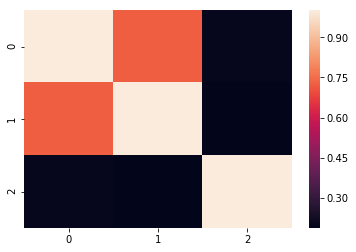

In [97]:
from codes.otherfunctions.multirun import get_cosines
cuz = get_cosines(np.swapaxes(df_M_full, 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [98]:
df_M_full_norm = df_M_full * np.sum(cuz, axis = 1)**2


In [78]:
#df_M_full_norm / df_M_full

In [58]:
np.sum(cuz, axis = 1)


array([1.92638359, 1.91600106, 1.38824769])

How should we normalize vectors in order to prioritize manifold support recovery?

Cosine - two in the same direction, so 1/2 the length makes for 1/2 the penalty

Group that maximizes subgradient of loss at that beta
\begin{align*}
(\sum_i -x^t (y - x \beta) + \|\beta\|_{1,2}) | \beta = \beta_1
\end{align*}


Cosines

In [106]:
df_M_full_norm[0].shape,replicates[0].tangent_bases[0].shape

((50, 3), (50, 2))

In [122]:
df_M_full_norm2 = np.swapaxes(experiment.normalize(np.swapaxes(df_M_full[:1],1,2)),1,2)

In [123]:
np.linalg.norm(df_M_full_norm2, axis = 1)

array([[1., 1., 1.]])

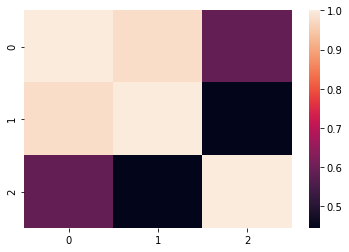

In [125]:
from codes.otherfunctions.multirun import get_cosines
cuz = get_cosines(np.swapaxes(df_M_full_norm2[:1], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [132]:
df_M_full_norm3 = df_M_full_norm2 / np.sum(cuz, axis = 1)

In [133]:
np.einsum('b m, b d -> m d', replicates[0].tangent_bases[0], df_M_full_norm3[0])

array([[-0.38946807, -0.40721184, -0.38251747],
       [ 0.00659918,  0.06598446, -0.30948829]])

In [135]:
np.einsum('b m, b d -> m d', replicates[0].tangent_bases[0], df_M_full_norm2[0])

array([[-0.99985648, -0.98712458, -0.77741252],
       [ 0.01694165,  0.15995331, -0.62899108]])

In [45]:
np.sum(cuz, axis = 1)**10


array([703.76504715, 666.74144845,  26.58701576])

In [31]:
np.linalg.norm(cuz, axis = 1)

array([1.25233984, 1.25072943, 1.03702557])

In [19]:
df_M_full_norm.shape

(10, 50, 3)

In [86]:
from codes.flasso.GradientGroupLasso import GradientGroupLasso

In [102]:
#replicate = replicates_small[0]
reg_l1s = [0.40565] #.20 has many
reg_l2 = [0.]
max_iter = 500
learning_rate = 1000.
tol = 1e-16
#replicate = replicates_small[0]
GGL = GradientGroupLasso(dg, df_M_full_norm, reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
lr 62.5
lr 31.25
lr 15.625
lr 7.8125
lr 3.90625
lr 1.953125
lr 0.9765625
lr 0.48828125
lr 0.244140625
lr 0.1220703125
lr 0.06103515625
1
lr 0.06103515625
2
lr 0.06103515625
3
lr 0.06103515625
4
lr 0.06103515625
5
lr 0.06103515625
6
lr 0.06103515625
7
lr 0.06103515625
8
lr 0.06103515625
9
lr 0.06103515625
10
lr 0.06103515625
11
lr 0.06103515625
12
lr 0.06103515625
13
lr 0.06103515625
14
lr 0.06103515625
15
lr 0.06103515625
16
lr 0.06103515625
17
lr 0.06103515625
18
lr 0.06103515625
19
lr 0.06103515625
20
lr 0.06103515625
21
lr 0.06103515625
22
lr 0.06103515625
23
lr 0.06103515625
24
lr 0.06103515625
25
lr 0.06103515625
26
lr 0.06103515625
27
lr 0.06103515625
28
lr 0.06103515625
29
lr 0.06103515625
30
lr 0.06103515625
31
lr 0.06103515625
32
lr 0.06103515625
33
lr 0.06103515625
34
lr 0.06103515625
35
lr 0.06103515625
36
lr 0.06103515625
37
lr 0.06103515625
38
lr 0.06103515625
39
lr 0.06103515625
40
lr 0.06103515625
41
lr 0.06103515625
42
lr 0.0610351

lr 0.06103515625
389
lr 0.06103515625
390
lr 0.06103515625
391
lr 0.06103515625
392
lr 0.06103515625
393
lr 0.06103515625
394
lr 0.06103515625
395
lr 0.06103515625
396
lr 0.06103515625
397
lr 0.06103515625
398
lr 0.06103515625
399
lr 0.06103515625
400
lr 0.06103515625
401
lr 0.06103515625
402
lr 0.06103515625
403
lr 0.06103515625
404
lr 0.06103515625
405
lr 0.06103515625
406
lr 0.06103515625
407
lr 0.06103515625
408
lr 0.06103515625
409
lr 0.06103515625
410
lr 0.06103515625
411
lr 0.06103515625
412
lr 0.06103515625
413
lr 0.06103515625
414
lr 0.06103515625
415
lr 0.06103515625
416
lr 0.06103515625
417
lr 0.06103515625
418
lr 0.06103515625
419
lr 0.06103515625
420
lr 0.06103515625
421
lr 0.06103515625
422
lr 0.06103515625
423
lr 0.06103515625
424
lr 0.06103515625
425
lr 0.06103515625
426
lr 0.06103515625
427
lr 0.06103515625
428
lr 0.06103515625
429
lr 0.06103515625
430
lr 0.06103515625
431
lr 0.06103515625
432
lr 0.06103515625
433
lr 0.06103515625
434
lr 0.06103515625
435
lr 0.06103515

In [103]:
np.where(np.linalg.norm(np.linalg.norm(GGL.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0] #squared

array([187, 565, 606, 612, 620, 624, 632, 709, 715, 716, 722, 733, 746])

In [100]:
np.where(np.linalg.norm(np.linalg.norm(GGL.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0] #squared

array([187, 606, 612, 624, 709, 715, 716, 722, 733, 746])

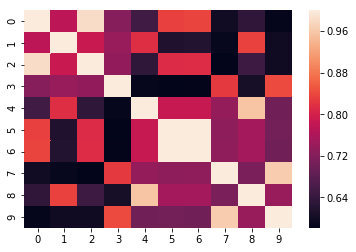

In [101]:
from codes.otherfunctions.multirun import get_cosines #2065, not squared
cuz = get_cosines(np.swapaxes(dg[:,:,[187, 606, 612, 624, 709, 715, 716, 722, 733, 746]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [94]:
np.where(np.linalg.norm(np.linalg.norm(GGL.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([187, 606, 612, 624, 709, 715, 716, 722, 733])

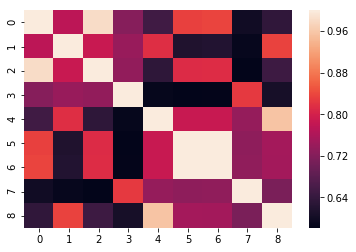

In [95]:
from codes.otherfunctions.multirun import get_cosines #2065, not squared
cuz = get_cosines(np.swapaxes(dg[:,:,[187, 606, 612, 624, 709, 715, 716, 722, 733]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [88]:
np.where(np.linalg.norm(np.linalg.norm(GGL.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([187, 565, 606, 612, 620, 624, 632, 709, 715, 716, 722, 733, 746])

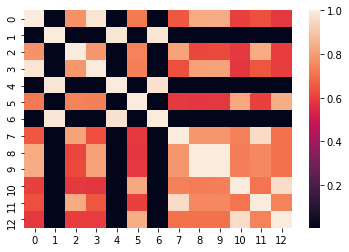

In [89]:
from codes.otherfunctions.multirun import get_cosines #2065, not squared
cuz = get_cosines(np.swapaxes(dg[:,:,[187, 565, 606, 612, 620, 624, 632, 709, 715, 716, 722, 733, 746]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

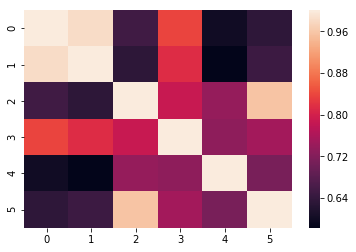

In [27]:
from codes.otherfunctions.multirun import get_cosines #2065, not squared
cuz = get_cosines(np.swapaxes(dg[:,:,[187, 612, 709, 716, 722, 733]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [ ]:
#squared didnt work